![alt text](http://3.bp.blogspot.com/--XO69gSfgao/U4xhOLjkwlI/AAAAAAAAECw/GM5mQbWYyPo/s1600/TitanicBeken.jpg "Titanic")

# Titanic: factors to survive

23.04.2016  
  
Oleg Leyzerov  
Kötschachtal 15  
5640 Bad Gastein  
Austria  

### Overview

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912, after colliding with an iceberg during her maiden voyage from Southampton, UK, to New York City, US. The sinking resulted in the deaths of more than 1,500 passengers and crew, making it one of the deadliest commercial peacetime maritime disasters in modern history.  Using the provided dataset and the knowledge gained in Udacity Data Analyst Nanodegree, I’ll try to identify factors made people more likely to survive.


I'm curious to know if there were any difference in survival chances between males and females; passengers of different classes and age groups. I'm also curious if the rule "Children and Women first" worked at Titanic. Let's check it in the study.  

For the current study I'm using the jupyter notebook, python and the number of libraries (pandas, numpy, matplotlib and seaborn). 

### Wrangling and exploration
Provided data set represents the passengers on the Titanic, and some information about them. On this step I'm going to dig into the data and clean it if necessary.

Our data consists from the following variables:
* PassengerId - A numerical id assigned to each passenger
* Survived - Whether the passenger survived (1), or didn't (0). This is going to be the dependent variable of our study
* Pclass - The class the passenger was in - first class (1), second class (2), or third class (3). Pclass is going to be one of the independent variables in our study
* Name - the name of the passenger
* Sex - The gender of the passenger - male or female. Sex is going to be one of the independent variables in our study
* Age - The age of the passenger. Fractional. Age (of age groups) is going to be one of the independent variables in our study
* SibSp - The number of siblings and spouses the passenger had on board
* Parch - The number of parents and children the passenger had on board
* Ticket - The ticket number of the passenger
* Fare - How much the passenger paid for the ticker
* Cabin - Which cabin the passenger was in
* Embarked - Where the passenger boarded the Titanic  

The operational definition of the dependent variable - the passenger survived or perished in the catastrophe. 
Thinking of the survival factors, I guess that age, sex and the class of the passenger might be important variables.


Next I'm going to load the file as pandas' data frame and get more insights from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/olegair/Documents/Hobby/data_analyst/p2/final_project/titanic_data.csv'
titanic_df = pd.read_csv(path)

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The provided function info() from pandas.DataFrame shows me all columns of the file as well as the number of rows and type in each column. First what I can mention is that columns Age, Cabin and Embarked have missing values.  
There are different approaches how to handle the missing values: we might ignore the rows with missing data, we might exclude the variable at all or we might substite it with some artificial value (f.ex. mean or median).  
As I suppose that Age is important for our analysis and we still have 80% of the data, I'm not going to exclude the variable. Port of embarkation doesn't seem interesting so far and for the cabin we have just ~23% of the data, so I'm not going to consider these variables in my study.  
Name, SibSp, Parch, Ticket and Fare are also going to be out of the scope of this study, so I'm going to exlude them as well.

In [3]:
del titanic_df['Name']
del titanic_df['SibSp']
del titanic_df['Parch']
del titanic_df['Ticket']
del titanic_df['Fare']
del titanic_df['Cabin']
del titanic_df['Embarked']

To decide should if I ignore the rows with missing age or fill the missing values with the mean, I'm going first to split the sample data into 2 samples: with filled age and without:

In [4]:
with_age = titanic_df[titanic_df['Age'].notnull()]
without_age = titanic_df[titanic_df['Age'].isnull()]

To be able to ignore the data without the age, I should be sure that passengers in these 2 samples are likely to have the similar survival rate.  
As these are 2 independent 2 samples, t test for independent variables might help me.  
My null hypothesis says that the means of the samples populatins are equal and alternative hypothesis says that population means are different. If the resulted p value is going to be less than 0.05 (with alpha level 0.05), I should reject the null hypothesis and conclude that population means are different not by chance (another word, ignorance the rows with missed age might get us different results).

I'm using the existing in scipy.stats function to perform t test for independent variables:

In [5]:
from scipy.stats import ttest_ind
ttest_ind(with_age['Survived'], without_age['Survived']) 

Ttest_indResult(statistic=2.7606993230995345, pvalue=0.0058865348400755626)

The result of the ttest shows the significant difference of considered samples. Consequently, I'm going to substitute the missing values with the mean age.

In [6]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


Now we can see that all columns have identical length. Let's see some descriptive statistics from built in the pandas library function describe (let's ignore PassengerId)

In [7]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,891,891.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,male,NaN
freq,NaN,NaN,NaN,577,NaN
mean,446.000000,0.383838,2.308642,NaN,29.699118
std,257.353842,0.486592,0.836071,NaN,13.002015
min,1.000000,0.000000,1.000000,NaN,0.420000
25%,223.500000,0.000000,2.000000,NaN,22.000000
50%,446.000000,0.000000,3.000000,NaN,29.699118
75%,668.500000,1.000000,3.000000,NaN,35.000000


I would like to know more of how the survival rate depends from different independent variables. I'm going to visualize the data using bar plots.

Populating the interactive namespace from numpy and matplotlib


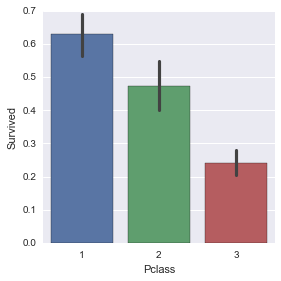

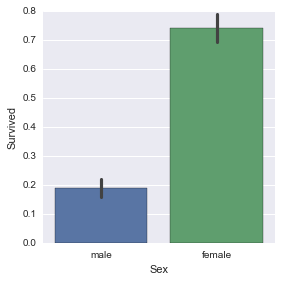

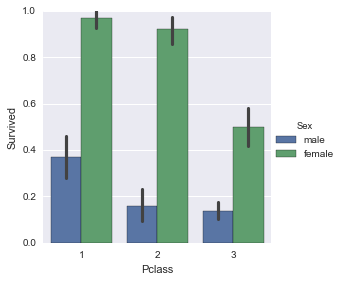

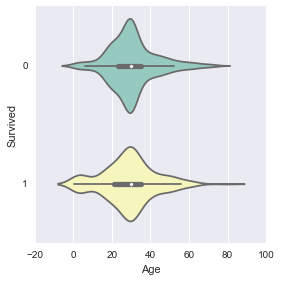

In [8]:
%pylab inline
sns.factorplot('Pclass','Survived', data = titanic_df, kind = 'bar')
sns.factorplot('Sex', 'Survived', data = titanic_df, kind = 'bar')
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = titanic_df, kind = 'bar')
sns.factorplot('Age',  'Survived',  data = titanic_df, hue_order = [1,0], orient="h", palette="Set3", kind="violin")

Looking at the above plots, it seems to me that females had more chances to survive than males, as well as the passengers of the first class had more chances than the passengers of the second class, and they had more chances than passengers of third class.  
To get more understanding of how our dependent variable varries from independent variables, I'm going to visualize it using violin plot in the seaborn library. Below are the plots of passenger class, age, sex and survival rate.

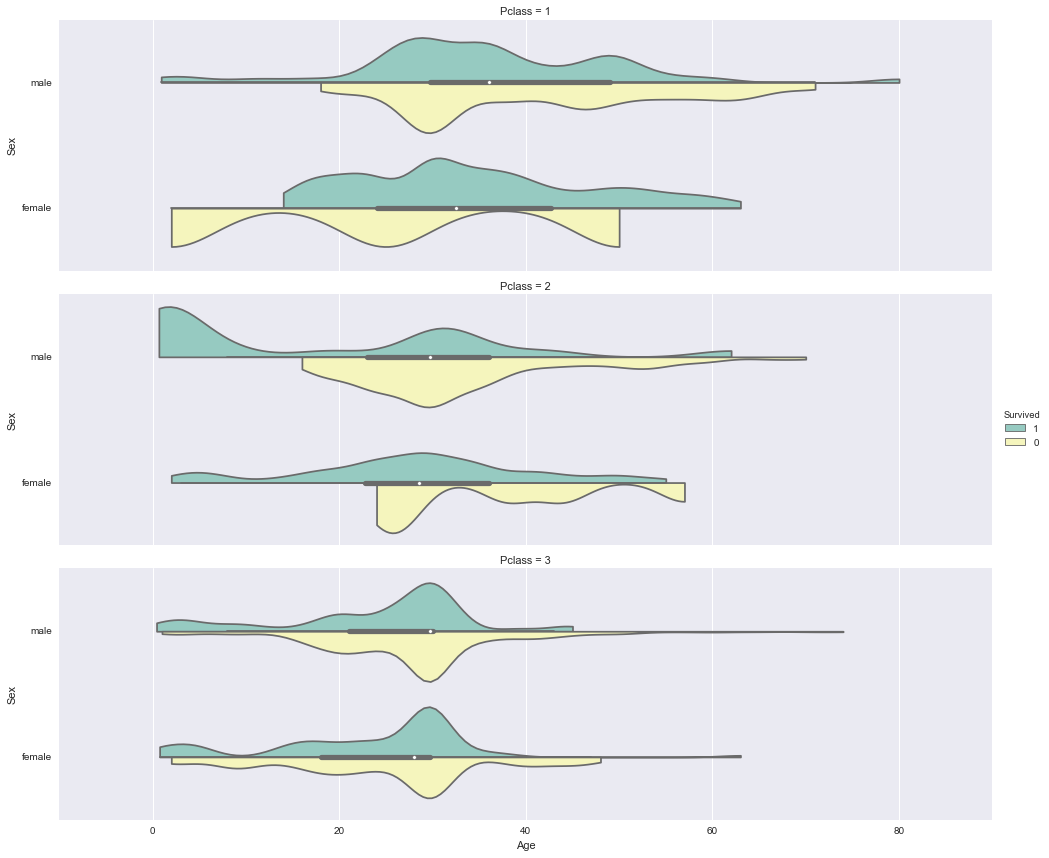

In [9]:
plot1 = sns.factorplot('Age','Sex', hue = 'Survived',row = 'Pclass',  data = titanic_df, hue_order = [1,0],
...                    orient="h",  aspect=3.5, palette="Set3",
...                    kind="violin", split=True, cut=0, bw=.2)
(plot1.set_axis_labels("Age", "Sex")) 

The plots show completeley different patterns of how survival rate depends from the passenger class, age and sex. It's also seems to me that in 1 and 2 class the rule "Children and Women first" worked which is not so obvious for 3 class.
I can see that almost all children in the 2nd class were survived. There is also a strict line that women in the second class after 25 years old were purished (who knows why it was...).

Now I'm going to add the column 'AGEgr' - create groups of ages (<18 - child, >60 - senior and rest - adults)

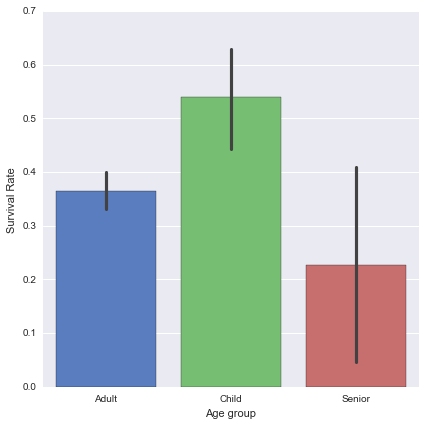

In [10]:
def age_to_group(age):
    if age < 18:
        return 'Child'
    elif age > 60: 
        return 'Senior'
    else:
        return 'Adult'
    
titanic_df['AGEgr'] = titanic_df['Age'].apply(age_to_group)    
plot = sns.factorplot('AGEgr', 'Survived',data = titanic_df, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Age group", "Survival Rate")

Getting some information from data visualization, I would like to investigate the independence of the survival rate and passenger class, age group and sex. By independence, we mean there is no consistent predictable relationships.  
  
As the survival rate is a categorical variables, we have a relatively large data sample (n>20, each expected cell frequency > 5) and observations are independent,  three 𝝌2 tests for independence lets us check the independence of survival rate and other three independent variables. Cramer's V afterwords helps us also interpret the result and estimate the effect size of the relationship.  
  
To practice in using pandas DataFrame, I've decided to implement 𝝌2 test by myself instead of using the existing function.


In [11]:
import scipy.stats as stats
def chi_sq(data,indep_var,dep_var):
    chi_crosstab = pd.crosstab(data[dep_var], data[indep_var])
    dep_var_index = titanic_df['Survived'].unique()
    chi_crosstab.index = dep_var_index
    
    indep_var_sum = chi_crosstab.sum()
    indep_var_index = indep_var_sum.index

    indep_var_total = chi_crosstab.sum().sum()

    exp_coef = chi_crosstab.sum(axis = 1) / indep_var_total
    
    chi_crosstab_exp = pd.DataFrame(np.outer(exp_coef,chi_crosstab.sum()))
    chi_crosstab_exp.columns = indep_var_index
    chi_crosstab_exp.index = dep_var_index
    
    chi_square_df = (chi_crosstab - chi_crosstab_exp)**2/chi_crosstab_exp
    chi_square = chi_square_df.sum().sum()
    
    dfreed = (len(data[indep_var].unique())-1)*(len(data[dep_var].unique())-1)
    crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                          df = dfreed)

    p_value = 1 - stats.chi2.cdf(x=chi_square,  # Find the p-value
                                 df=dfreed)    
    
    cramer_v = np.sqrt(chi_square/len(data))
    
    return chi_square, p_value, cramer_v

In [12]:
chi_sq(titanic_df, 'Pclass', 'Survived')

(102.88898875696056, 0.0, 0.33981738800531175)

In [13]:
chi_sq(titanic_df,'AGEgr','Survived')

(15.030221080773899, 0.00054478979203753664, 0.12988046425562583)

In [14]:
chi_sq(titanic_df,'Sex','Survived')

(263.05057407065567, 0.0, 0.54335138065775512)

### Conclusion
Based on the 𝝌2 statitstic and 𝝌2 critical values, calculated in the function, I can reject all 3 hypothesis at 𝞪 = 0.05, p < 0.05. We can conclude that age, sex and passenger class influence on the survival level.
According to interpretation of Cramer's V by J. Cohen, sex has strong strong effect, passenger class has medium effect and age has small effect on on survival rate.   
Females tend to had more chances to survive over the men; passengers of the 1st class tend to have more chances to survive than 2 class, and 2nd class over the 3rd class. And children tend to survive over the adults and adults over the seniors.
#### Limitations of the study
It's important to identify and acknowledge the limitation of the study. 
1. Correlation doesn't imply causation. My conclusions are based just on the provided data set. To get the real causation, I should conduct the controlled experiment which is most probably not possible.
2. Using sample instead of the population. It's known, that there were 1317 passengers and 885 crew members on the board of Titanik. Our data set represent just 891 persons. There is no clear mention of the crew members in the data set - so either they are not in the data set or they are hidden among the passengers of the 1, 2 and 3 classes. If the crew memebers are represented in our data set, the overal statistic might be distorted.[1]
3. Measures used to collect the data. Based on Statistical Consultants Ltd[2], the Titanic survival data set has some uncertainties due to several reasons like double counting caused by people using aliases, the final passenger list not having been updated to account for every person who cancelled their trip, some people died (as a result of injuries or exposure) after they were picked up by the rescue ship (the RMS Carpathia).
4. There are the variables that I don't analyse (SibSp, Parch, cabin, etc.). These variables have bias (based on the description of the data; f.ex.: With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.) or significant amount of data is missed (like for Cabin). To avoid adding noice to the analysis, I've decided to exclude them from the analysis.
5. Handling missing values. The dataset is filled with missing values of the age. The missing age values are imputed with the mean and here is the comparison between default (dropped missing values) and imputed age values:

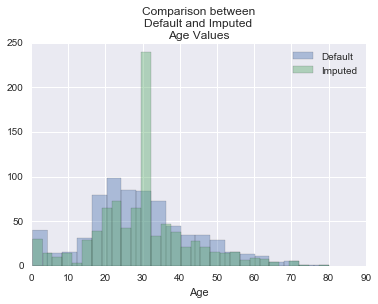

In [20]:
titanic_df2 = pd.read_csv(path)
sns.distplot(titanic_df2.Age.dropna(), kde = False, label = 'Default')
sns.distplot(titanic_df2.Age.fillna(titanic_df2.Age.mean()), kde = False, label = 'Imputed')
plt.title('Comparison between\nDefault and Imputed\nAge Values')
plt.legend()

As we see, the mean value is being massively over represented which is a limitation as this will effect potential statistical testing.  
  
There are the ways for the future improvement of the analysis. We might extend the data set with all existing values as well as analyse another variables like fare price, port of embarkation, etc.

### References
1. Encyclopedia Titanica http://www.encyclopedia-titanica.org/titanic-research-articles/
1. Statistical Consultants Ltd http://www.statisticalconsultants.co.nz/blog/titanic-survival-data.html